In [1]:
###### installing the quandl package
!pip3 install quandl
###### installing sklearn
# !pip install sklearn

In [2]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [10]:
quandl.ApiConfig.api_key = 'sWyVyCVVqp3yoq9rQJQM';

stockPrice = quandl.get('WIKI/amzn')            #### Stock prices for amazon
# stockPrice = quandl.get('WIKI/aapl')            #### Stock prices for apple
# stockPrice = quandl.get('WIKI/googl')            #### Stock prices for google

stockPrice = stockPrice[['Close']]
stockPrice

,Close
Date,
1997-05-16,20.75
1997-05-19,20.50
1997-05-20,19.63
1997-05-21,17.13
1997-05-22,16.75
...,...
2018-03-21,1581.86
2018-03-22,1544.10
2018-03-23,1495.56


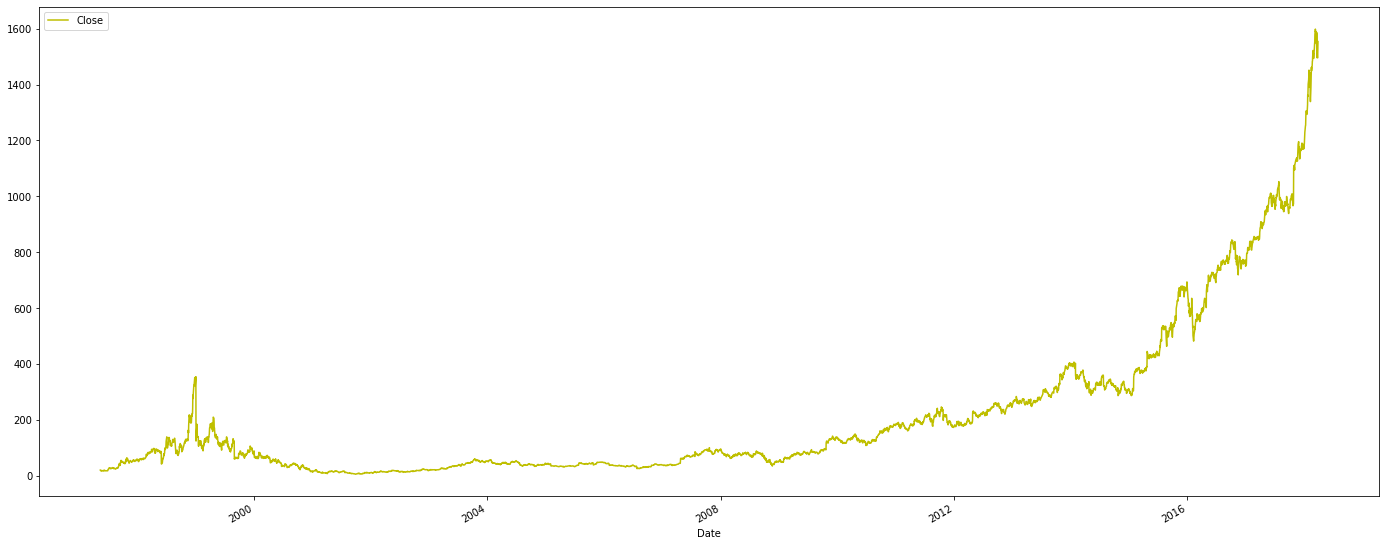

In [11]:
stockPrice.Close.plot(figsize=(24, 10), color='y')
plt.legend()
plt.show()

In [12]:
forecast = 30
stockPrice['Forecast'] = stockPrice.Close.shift(-forecast)

X = np.array(stockPrice.Close)
X = preprocessing.scale(X)
X = np.resize(X, (X.size, 1))

X_forecast = X[-forecast:];               # Don't have prediction values, can be used to forecast latest labels.
# X_forecast = preprocessing.scale(X_forecast)
X = X[:-forecast];                        # Only the useful values, rest are ignored.
# X = preprocessing.scale(X)

y = np.array(stockPrice.Forecast)
y = y[:-forecast];                        # Only the useful values, rest are ignored.

# X_forecast

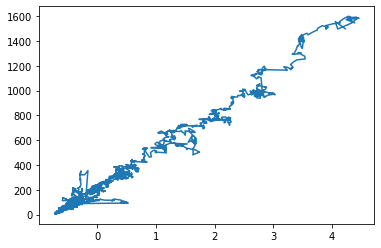

In [13]:
plt.plot(X, y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)

forecast_pred = model.predict(X_forecast)
y_pred = model.predict(X_test)
print(accuracy)

0.9853909407447796


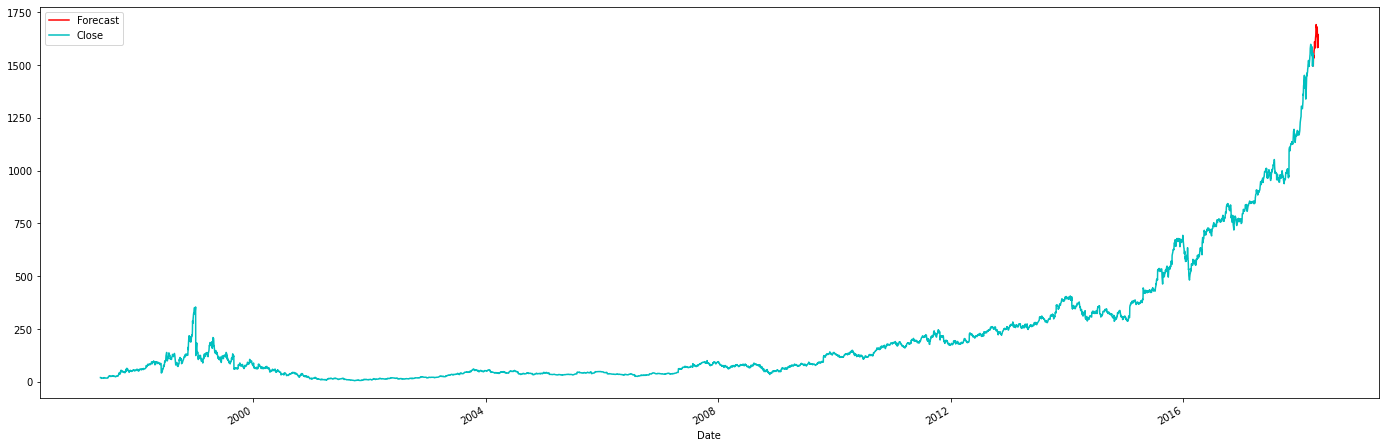

(736445.0, 737192.5)

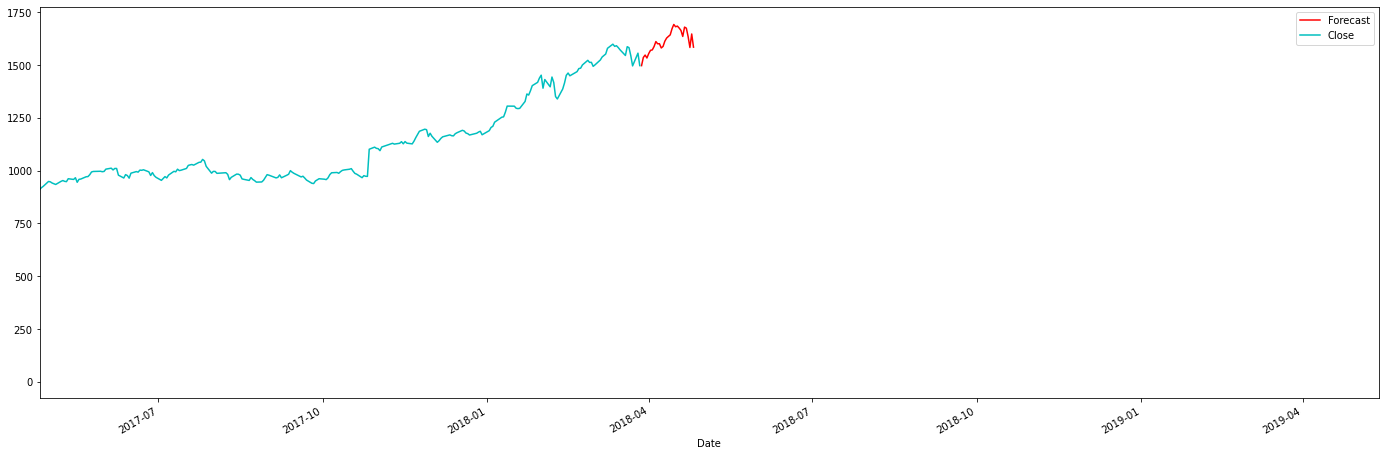

In [15]:
dates = pd.date_range(start="2018-03-28", end="2018-04-26")
plt.plot(dates, forecast_pred, color='r',label='Forecast')
stockPrice.Close.plot(figsize=(24, 8), color='c')
plt.legend()
plt.show()

# Zoomed in
plt.plot(dates, forecast_pred, color='r',label='Forecast')
stockPrice.Close.plot(figsize=(24, 8), color='c')
plt.legend()
plt.xlim(xmin='2017-04-26')